In [ ]:
!git clone https://github.com/bharat-b7/MultiGarmentNetwork.git
!wget https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset.zip
!unzip Multi-Garmentdataset.zip
!rm Multi-Garmentdataset.zip
!wget https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset_02.zip
!unzip Multi-Garmentdataset_02.zip
!rm Multi-Garmentdataset_02.zip
!gdown --id 1t4tvZCbRT37iBOpVCoOBHHQ4D6KsOAz3 -O MultiGarmentNetwork/assets/neutral_smpl.pkl
!git clone https://github.com/pmh47/dirt.git
!sed -i 's|set(CMAKE_CUDA_FLAGS "${CMAKE_CUDA_FLAGS} -arch=sm_30 --expt-relaxed-constexpr -DNDEBUG")|set(CMAKE_CUDA_FLAGS "${CMAKE_CUDA_FLAGS} -arch=sm_60 --expt-relaxed-constexpr -DNDEBUG")|' dirt/csrc/CMakeLists.txt
!(cd dirt && pip install .)
!git clone https://github.com/MPI-IS/mesh.git
!sudo apt-get install libboost-dev # don't need on colab
!(cd mesh/ && BOOST_INCLUDE_DIRS=/usr/lib/x86_64-linux-gnu/ make all)
!wget https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/weights.zip
!unzip weights.zip
!rm weights.zip
!mv Multi-Garment\ Network/test_data.pkl MultiGarmentNetwork/test_data.pkl
!mv Multi-Garment\ Network/saved_model/ MultiGarmentNetwork/saved_model/
!mv Multi-Garment\ Network/assets/* MultiGarmentNetwork/assets/
!rm -r Multi-Garment\ Network/
!sudo apt-get install -y xvfb
!sed -i "s|import cPickle as pkl|import _pickle as pkl|" MultiGarmentNetwork/visualize_scan.py
!sed -i "s|/BS/bharat/work/MGN_release/||" MultiGarmentNetwork/visualize_scan.py
!sed -i "s|scan.show()|scan.show().save_snapshot('scan.png', blocking=True)|" MultiGarmentNetwork/visualize_scan.py
!sed -i "s|scan2.show()|scan2.show().save_snapshot('scan2.png', blocking=True)|" MultiGarmentNetwork/visualize_scan.py

In [2]:
from IPython.display import Image

In [3]:
!xvfb-run -a python MultiGarmentNetwork/visualize_scan.py

Saving snapshot to scan.png, please wait...
Saving snapshot to scan2.png, please wait...
Done


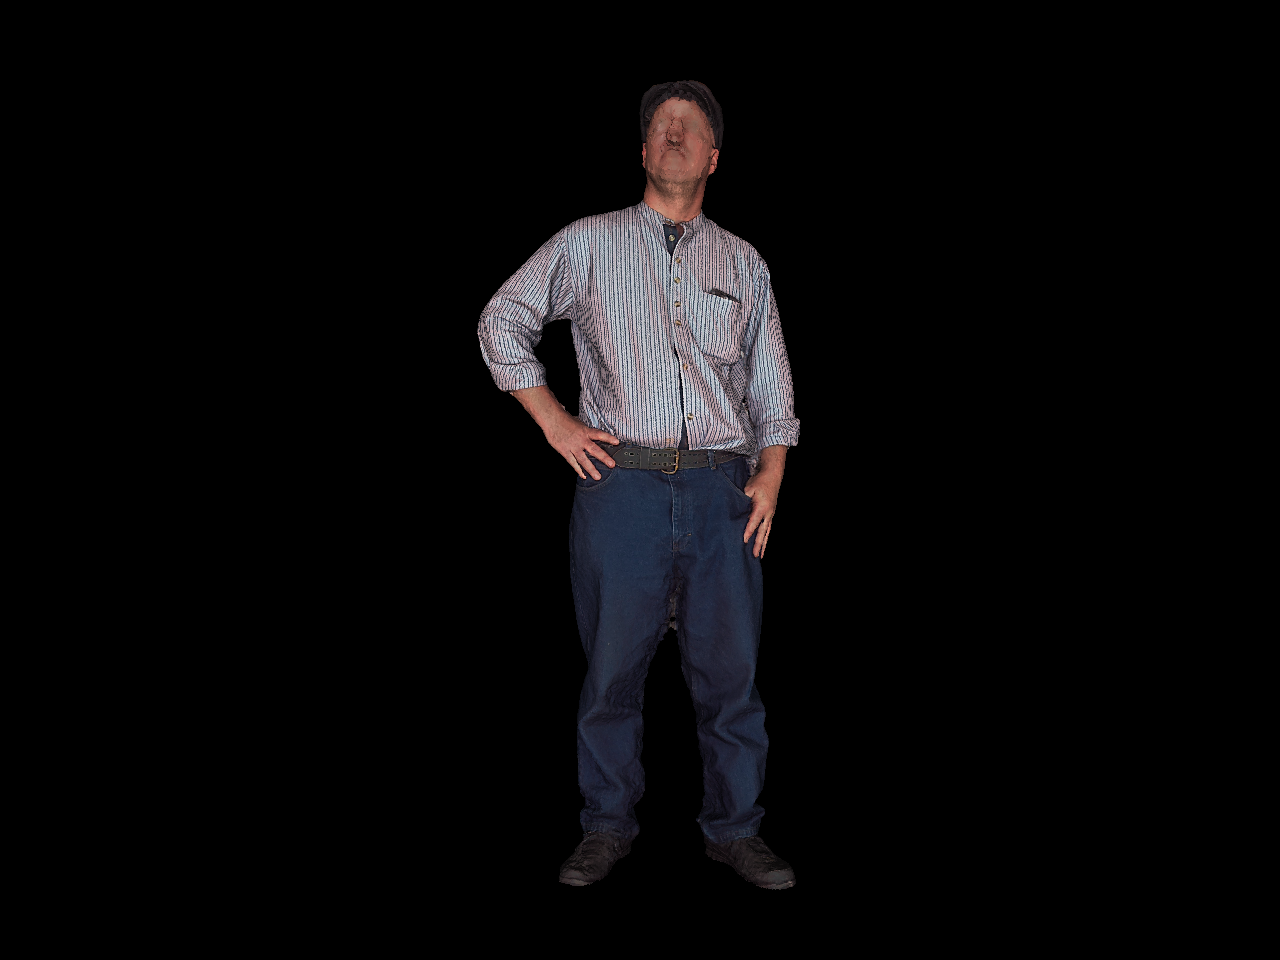

In [4]:
Image('scan.png')

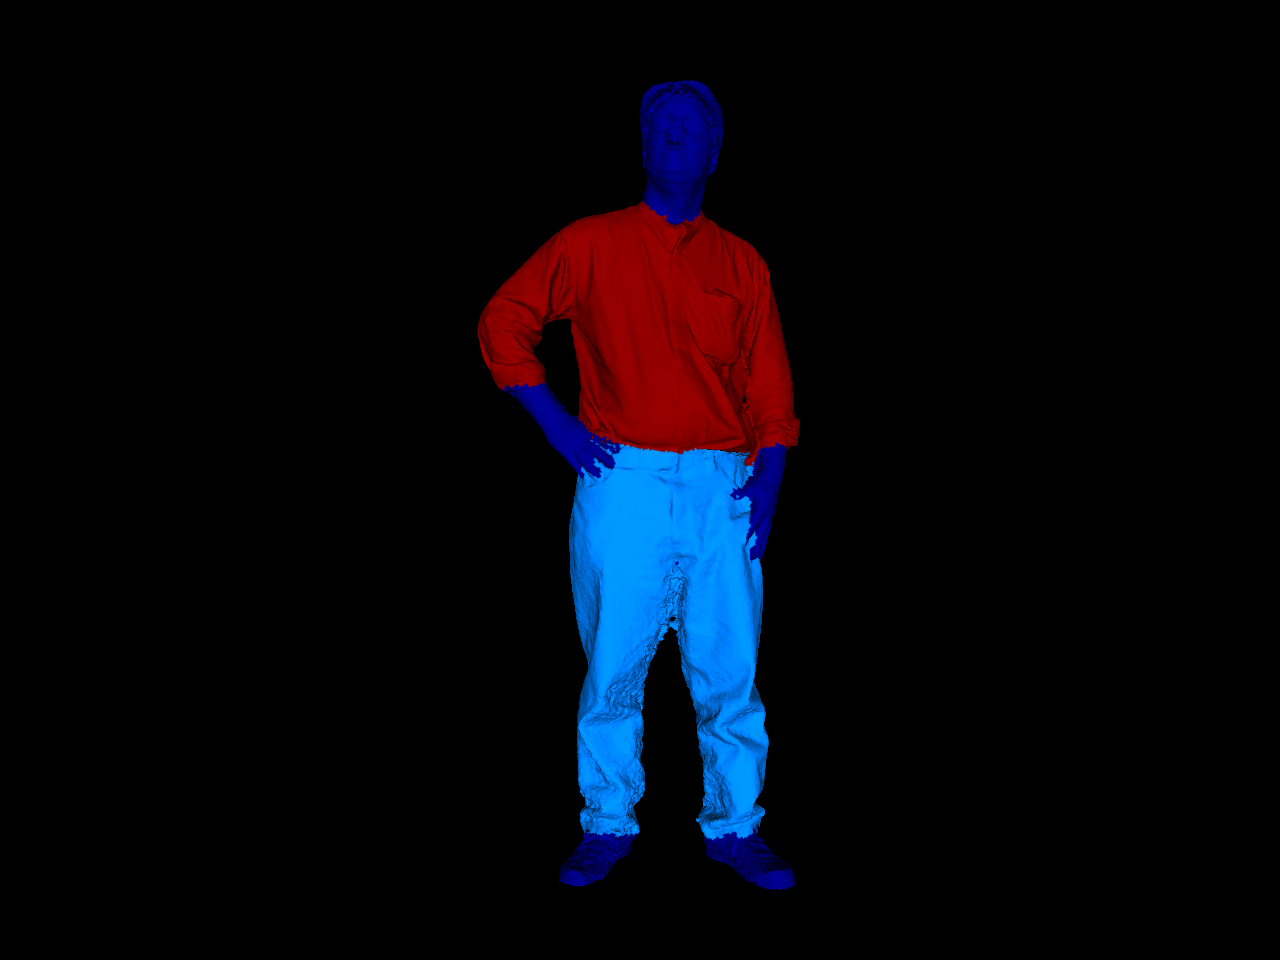

In [5]:
Image('scan2.png')

In [6]:
!find ./ -type f -name "*.py" -exec sed -i 's|import cPickle as pkl|import _pickle as pkl|' {} \;
!find ./ -type f -name "*.py" -exec sed -i 's|import cPickle as pickle|import _pickle as pickle|' {} \;

In [7]:
!sudo apt-get install -qq libboost-dev xvfb libosmesa6-dev
!pip install chumpy opendr

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libosmesa6:amd64.
(Reading database ... 160779 files and directories currently installed.)
Preparing to unpack .../libosmesa6_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking libosmesa6:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Selecting previously unselected package libosmesa6-dev:amd64.
Preparing to unpack .../libosmesa6-dev_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking libosmesa6-dev:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up libosmesa6:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up libosmesa6-dev:amd64 

In [8]:
!find ./ -type f -name "*.py" -exec sed -i "s|from verts|from .verts|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|^import lbs$|from . import lbs|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from posemapper|from .posemapper|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from serialization|from .serialization|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/bharat/work/MGN_final_release/|MultiGarmentNetwork/|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/RVH/work/data/smpl_models/neutral/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl|MultiGarmentNetwork/assets/neutral_smpl.pkl|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/bharat/work/MGN_release/||" {} \;

In [9]:
!find ./ -type f -name "*.py" -exec sed -i -r s/pkl\.load[\(]open[\(]\(.+\)[\)][\)]/pkl.load\(open\(\\1,\ \'rb\'\)\ ,\ encoding=\'latin1\'\)/g  {} \;

In [10]:
!sed -i "s|mvs\[0\]\[1\].set_static_meshes(\[garment_org_body\])|mvs\[0\]\[1\].set_static_meshes(\[garment_org_body\]); mvs\[0\]\[1\].save_snapshot('garment_org_body.png', blocking=True)|" MultiGarmentNetwork/visualize_garments.py
!sed -i "s|mvs\[0\]\[2\].set_static_meshes(\[garment_org_body, garment_posed\])|mvs\[0\]\[2\].set_static_meshes(\[garment_org_body, garment_posed\]); mvs\[0\]\[2\].save_snapshot('garment_org_body_garment_posed.png', blocking=True)|" MultiGarmentNetwork/visualize_garments.py
!sed -i "s|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\])|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\]); mvs\[0\]\[0\].save_snapshot('garment_unposed.png', blocking=True)|" MultiGarmentNetwork/visualize_garments.py

In [12]:
!find ./ -type f -name "*.py" -exec sed -i "s|assets/garment_fts.pkl|MultiGarmentNetwork/assets/garment_fts.pkl|" {} \;

In [13]:
!xvfb-run -a python MultiGarmentNetwork/visualize_garments.py

Saving snapshot to garment_org_body.png, please wait...
Saving snapshot to garment_org_body_garment_posed.png, please wait...
Saving snapshot to garment_unposed.png, please wait...
Done


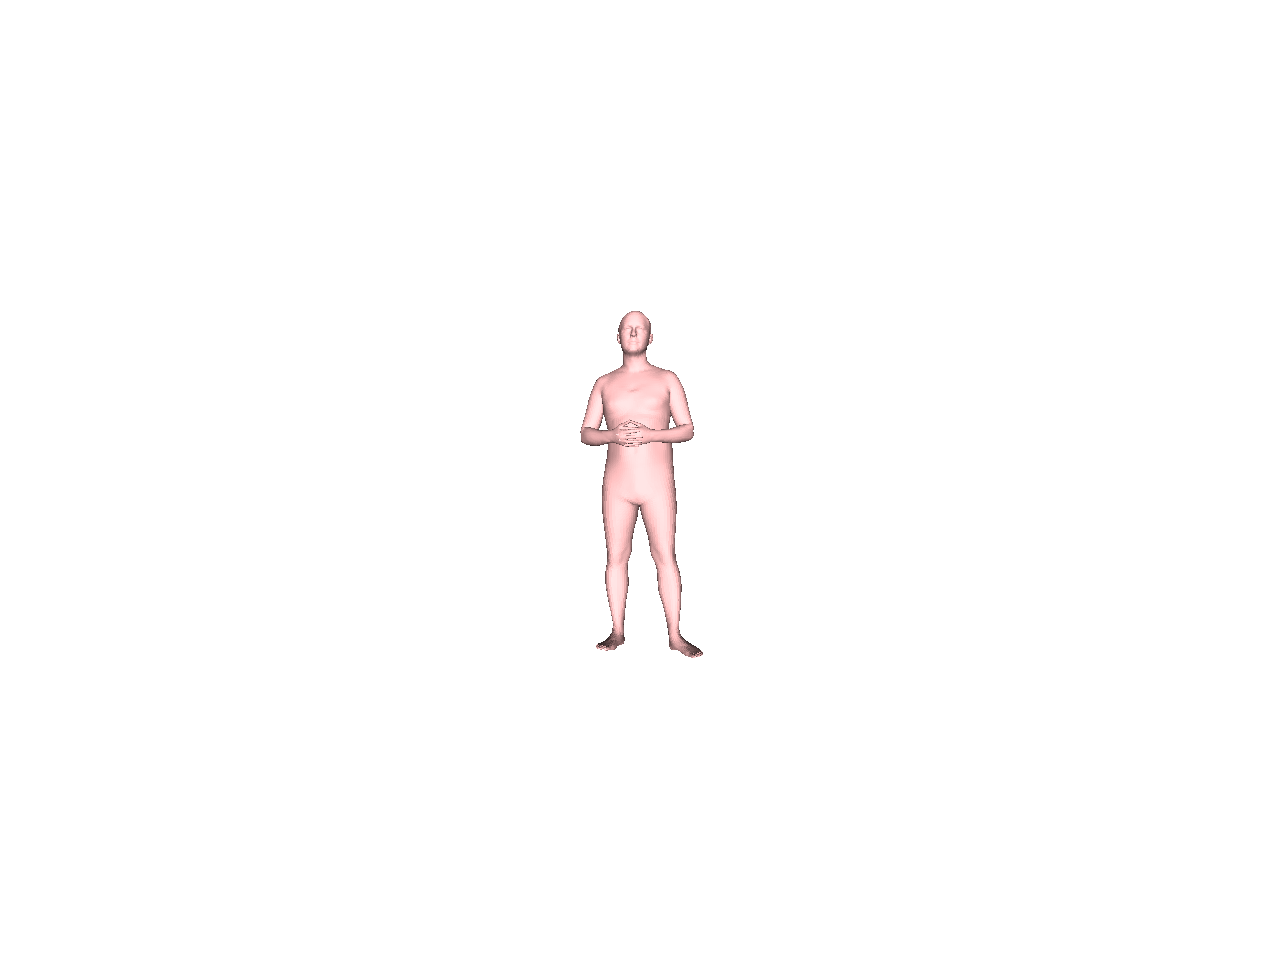

In [14]:
Image('garment_org_body.png')

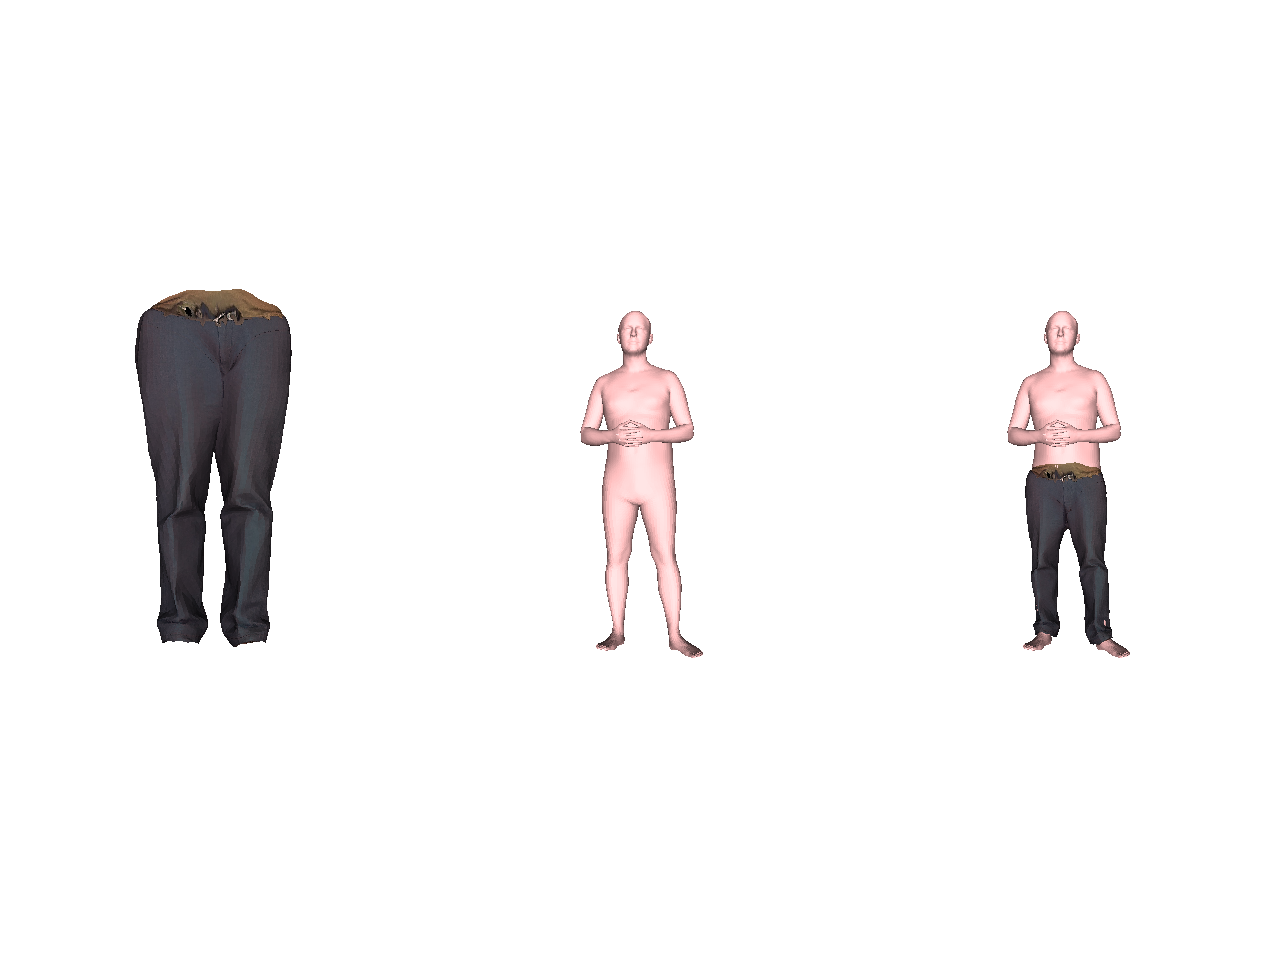

In [15]:
Image('garment_unposed.png')

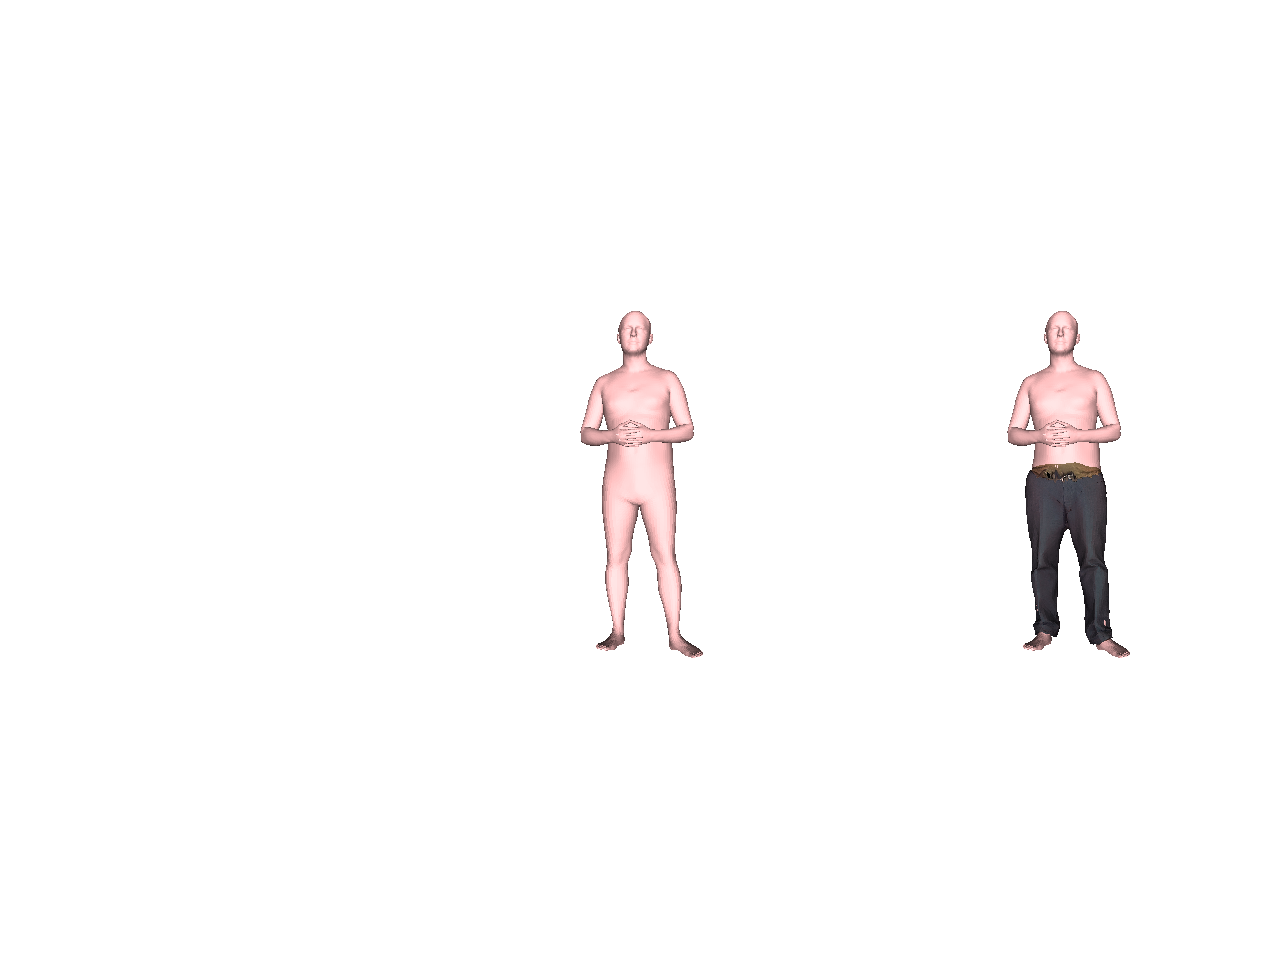

In [16]:
Image('garment_org_body_garment_posed.png')

In [ ]:
# код для визуализации в dress_SMPL.py
# mvs = MeshViewer()
# mvs.set_static_meshes([garment_unposed]); mvs.save_snapshot('garment_unposed.png', blocking=True)
# mvs = MeshViewer()
# mvs.set_static_meshes([tgt_body]); mvs.save_snapshot('tgt_body.png', blocking=True)
# mvs = MeshViewer()
# mvs.set_static_meshes([garment_org_body_unposed]); mvs.save_snapshot('garment_org_body_unposed.png', blocking=True)
# mvs = MeshViewer()
# mvs.set_static_meshes([new_garment, tgt_body]); mvs.save_snapshot('new_garment_tgt_body.png', blocking=True)
# mvs = MeshViewer()
# mvs.set_static_meshes([new_garment]); mvs.save_snapshot('new_garment.png', blocking=True)

Рандомный smpl

In [17]:
!xvfb-run -a python MultiGarmentNetwork/dress_SMPL.py

Saving snapshot to garment_unposed.png, please wait...
Saving snapshot to tgt_body.png, please wait...
Saving snapshot to garment_org_body_unposed.png, please wait...
Saving snapshot to new_garment_tgt_body.png, please wait...
Saving snapshot to new_garment.png, please wait...
Done


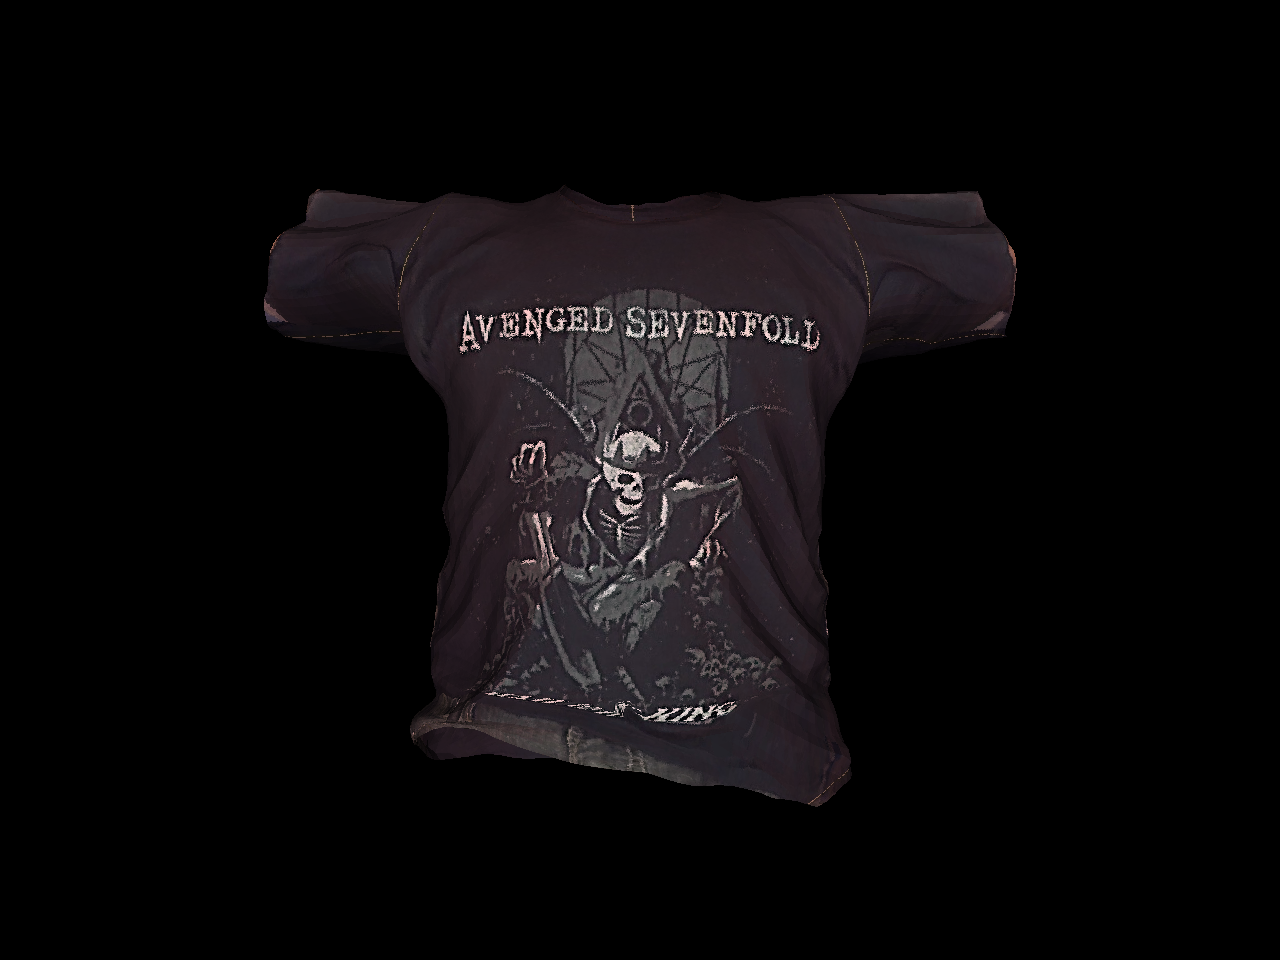

In [18]:
Image('garment_unposed.png')

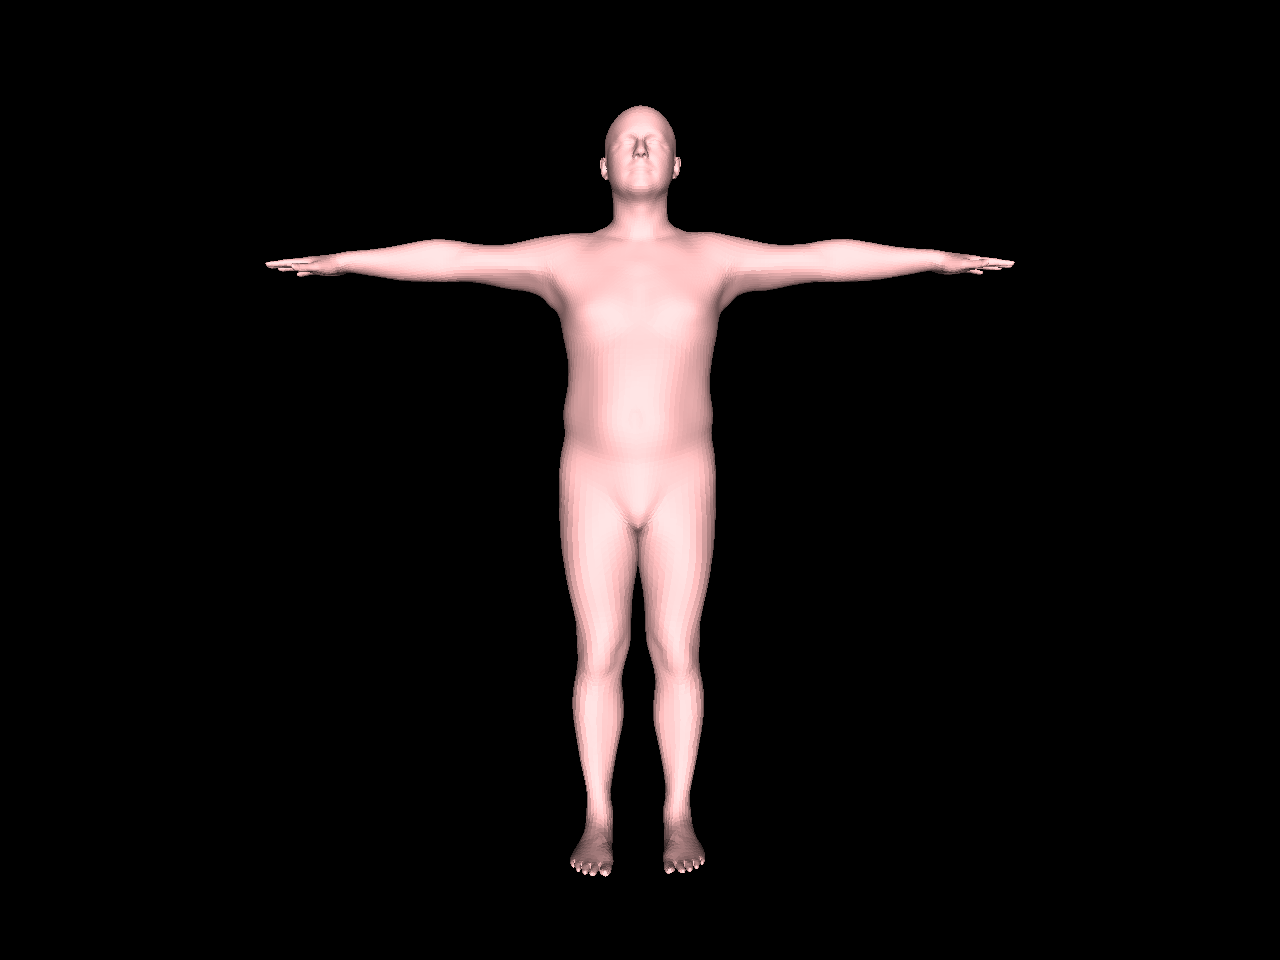

In [19]:
Image('garment_org_body_unposed.png')

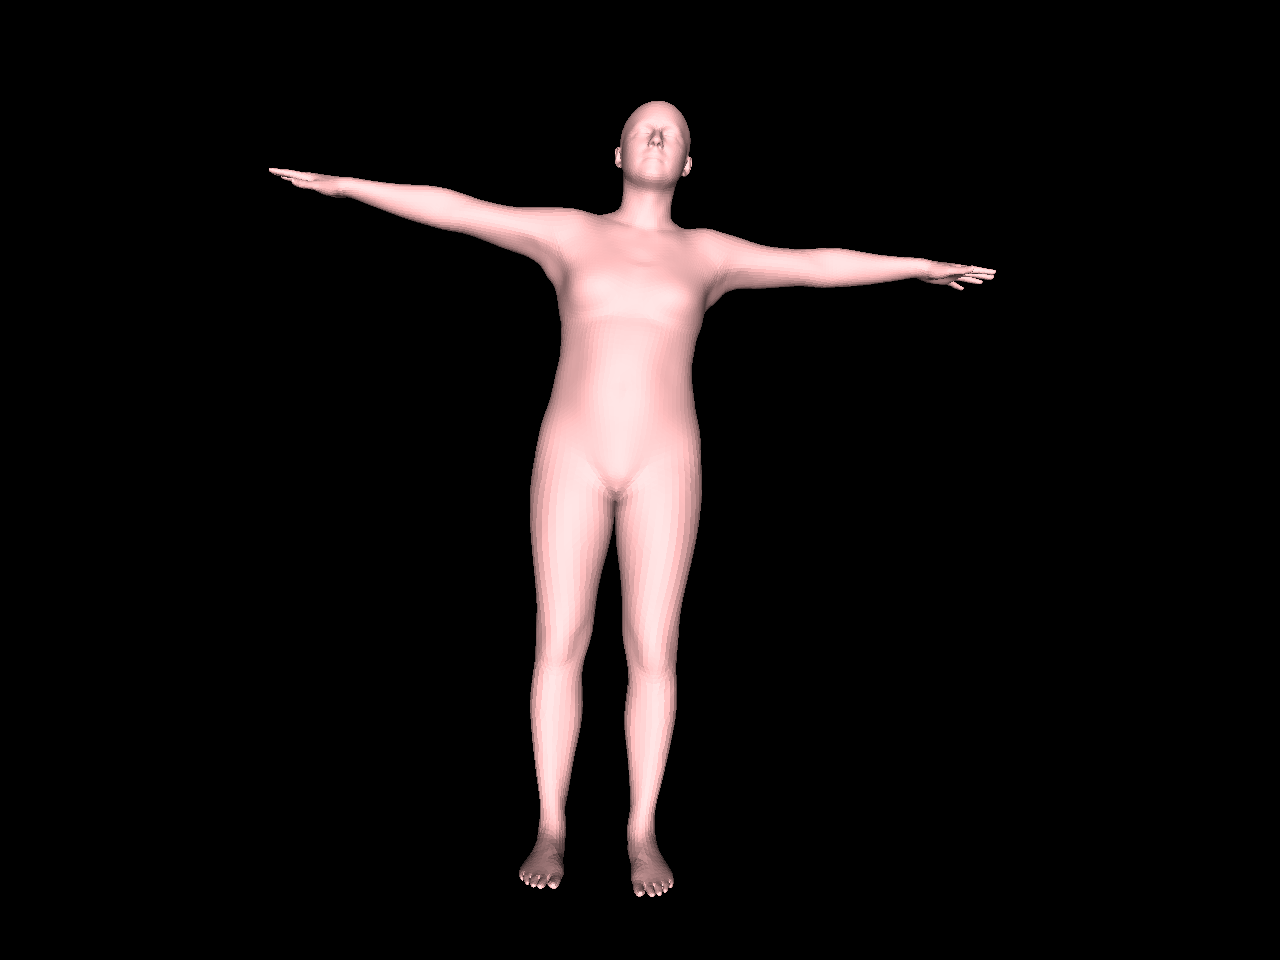

In [20]:
Image('tgt_body.png')

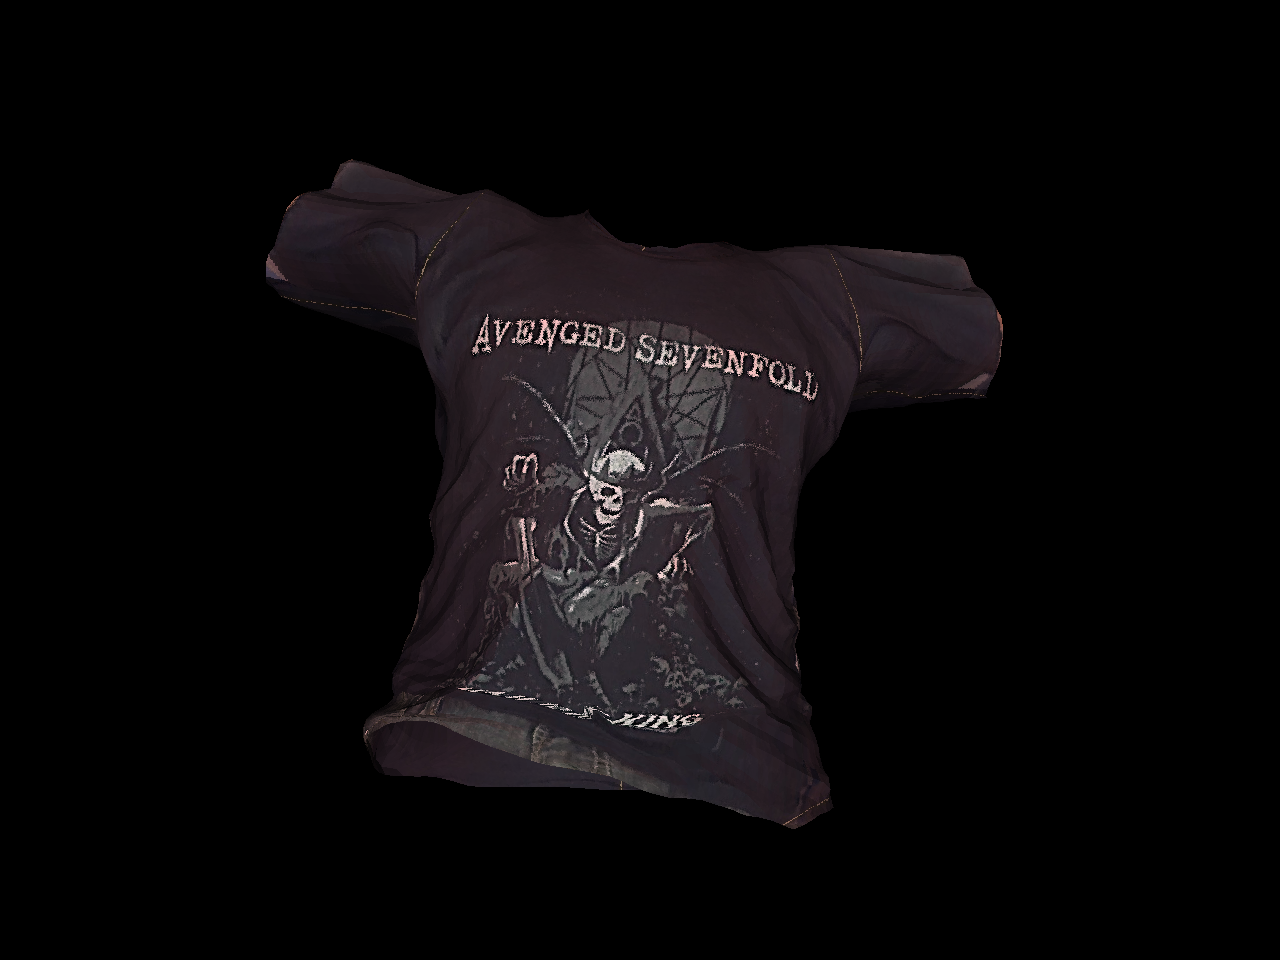

In [21]:
Image('new_garment.png')

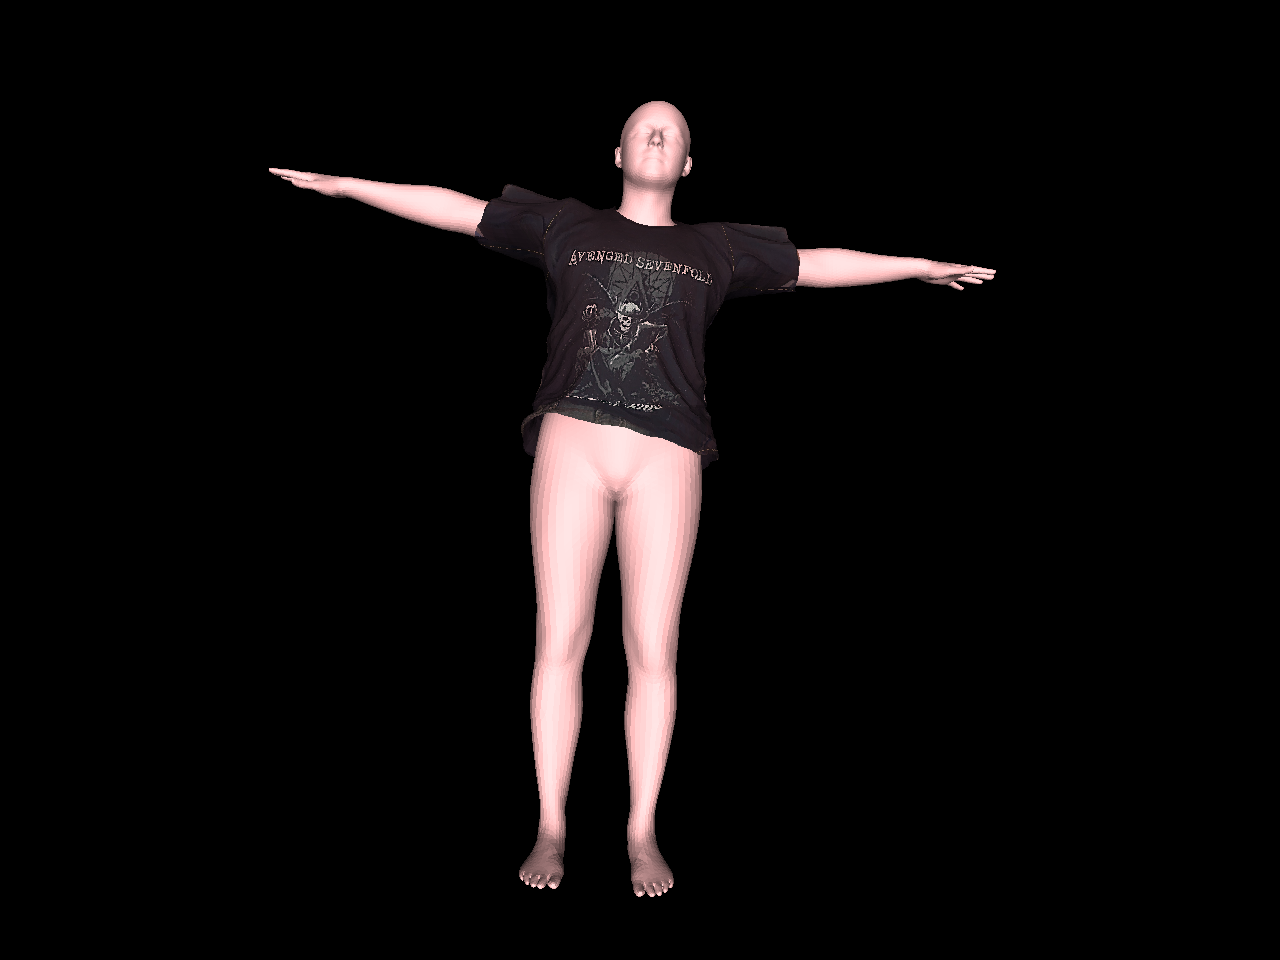

In [22]:
Image('new_garment_tgt_body.png')

Хардкод smpl из frankmocap(1 кадр тестового видео)

In [ ]:
# smpl.pose[:] = [ 2.91917920e+00,  4.58017364e-02,  1.53551847e-01,
#         -9.22530651e-01,  8.30429792e-02,  3.82127285e-01,
#         -8.67569566e-01, -9.41842701e-03, -3.08711380e-01,
#          5.51593125e-01, -2.62972228e-02,  1.17724165e-02,
#          1.55291820e+00,  9.38382372e-02, -2.03269675e-01,
#          1.60624826e+00, -1.72855295e-02,  1.70969218e-01,
#         -5.60724996e-02, -2.51412056e-02, -6.79262029e-03,
#         -1.70694739e-01,  7.73771927e-02, -6.54179528e-02,
#         -2.13481039e-01, -2.78314129e-02, -1.45036180e-03,
#         -3.69013101e-02, -1.13427769e-02, -8.66152346e-03,
#         -2.59527802e-01,  6.41327873e-02,  1.68739066e-01,
#         -2.42282629e-01, -1.39641911e-01, -1.29240543e-01,
#         -3.32024634e-01, -9.92928073e-02, -7.45689273e-02,
#          5.03234453e-02, -2.15491727e-01, -3.47436190e-01,
#          3.79543081e-02,  1.83946118e-01,  3.41378152e-01,
#         -4.32795659e-02, -8.62272158e-02,  1.32593364e-02,
#          9.13528800e-02, -3.66373211e-01, -8.13994765e-01,
#          8.22413862e-02,  2.69980103e-01,  8.60714853e-01,
#          2.12322161e-01, -9.02887702e-01,  2.42460236e-01,
#          1.48995027e-01,  7.73568034e-01, -1.55371800e-01,
#          2.44113714e-01, -3.91888991e-02,  2.08952576e-01,
#          1.52510270e-01,  3.13121825e-02, -1.60491675e-01,
#         -2.35091552e-01, -1.13584720e-01, -2.44322896e-01,
#         -2.06727579e-01,  1.06525600e-01,  2.20032185e-01]

In [ ]:
# smpl.betas[:] = [-0.07374195,  0.28103164,  0.8782826 ,  1.02707   ,  0.01031819,
#          0.21681331, -0.40122116,  0.26367468,  0.6040064 ,  0.09588519]

In [ ]:
# snapshot_camera=[1.2181793 , 0.01277799, 0.39648765]

In [52]:
!xvfb-run -a python MultiGarmentNetwork/dress_SMPL.py

Saving snapshot to garment_unposed.png, please wait...
Saving snapshot to tgt_body.png, please wait...
Saving snapshot to garment_org_body_unposed.png, please wait...
Saving snapshot to new_garment_tgt_body.png, please wait...
Saving snapshot to new_garment.png, please wait...
Done


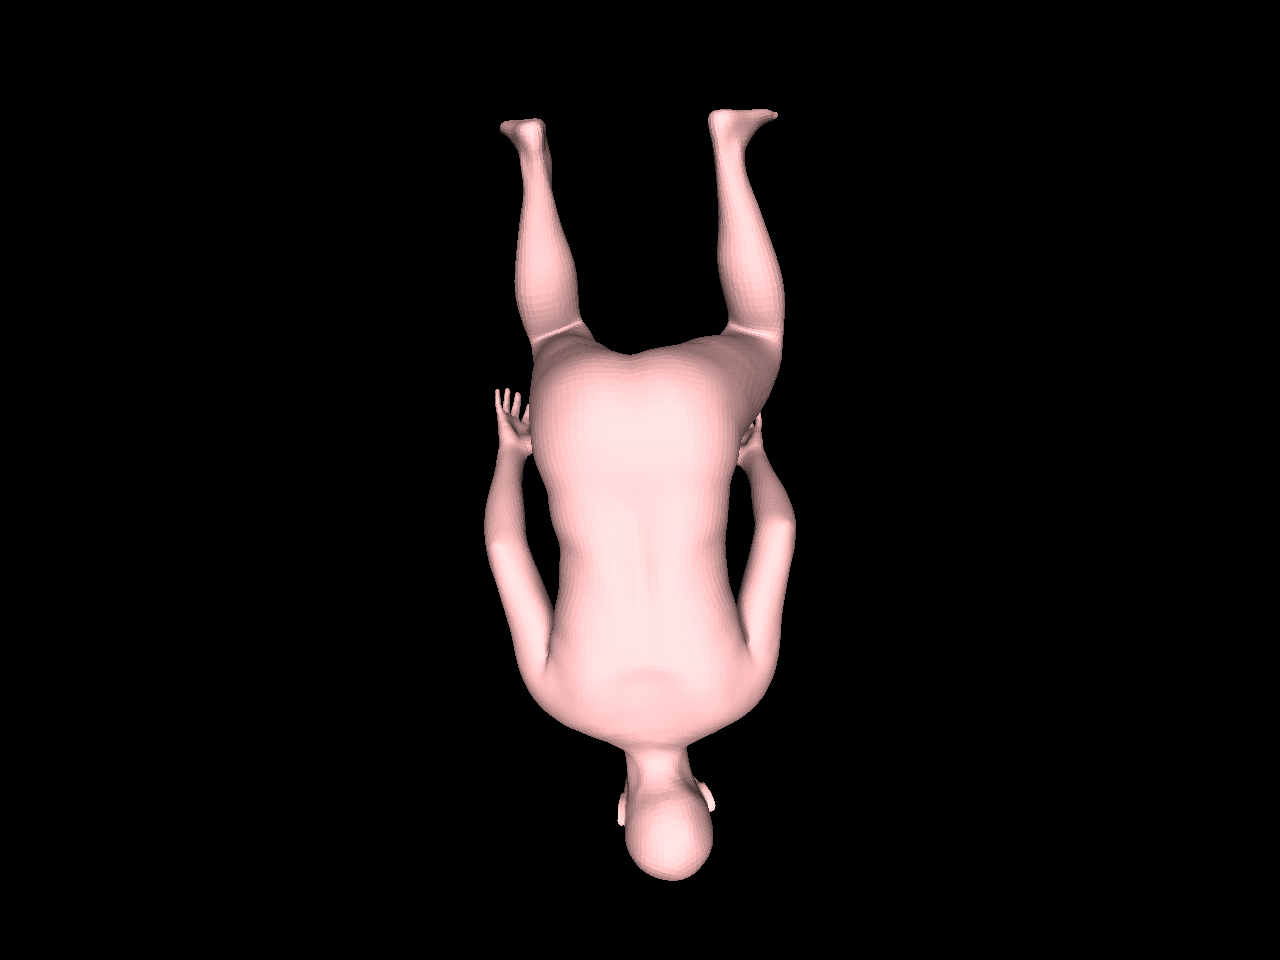

In [53]:
Image('tgt_body.png')

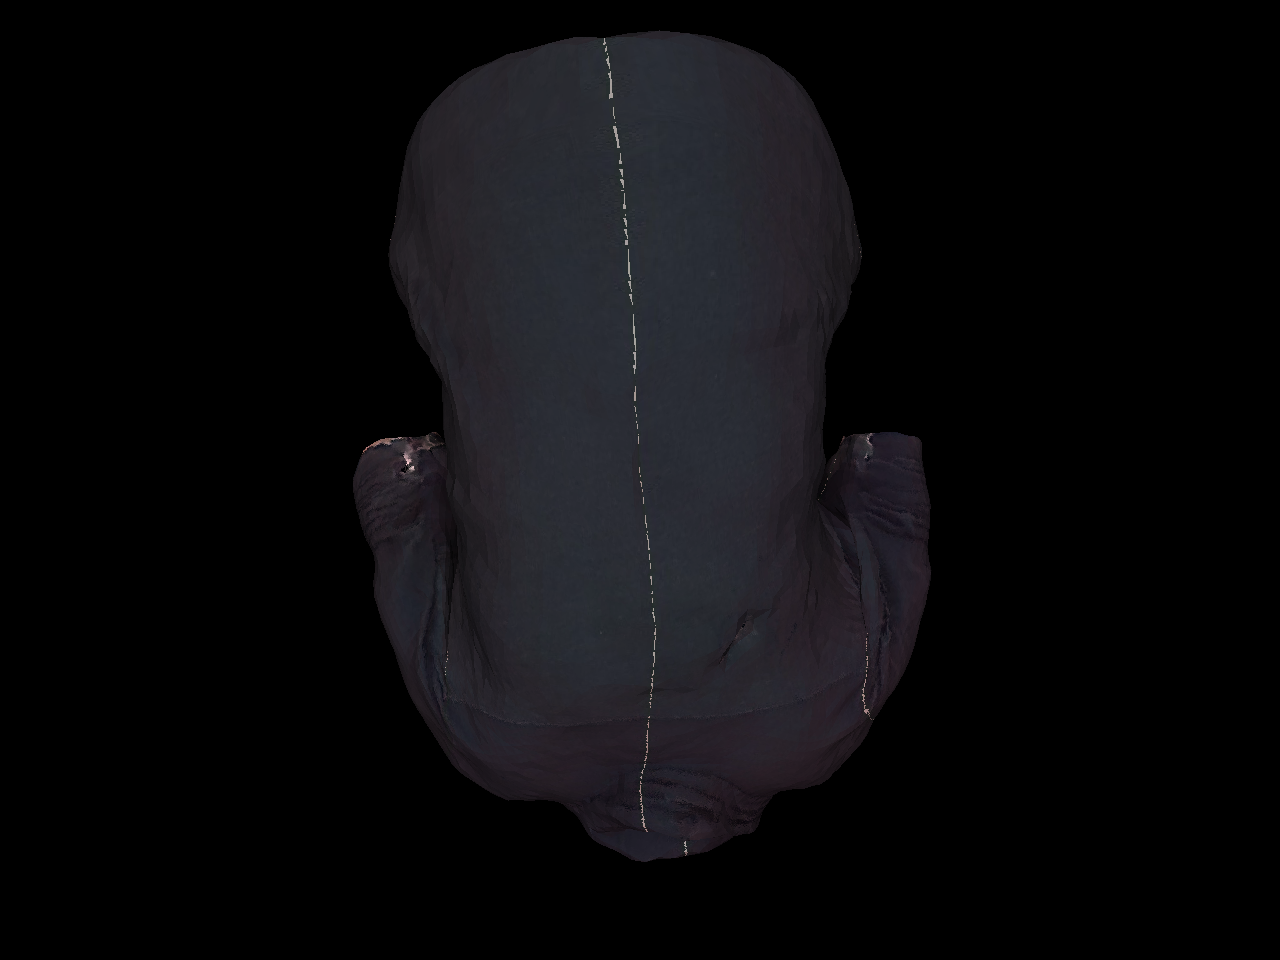

In [50]:
Image('new_garment.png')

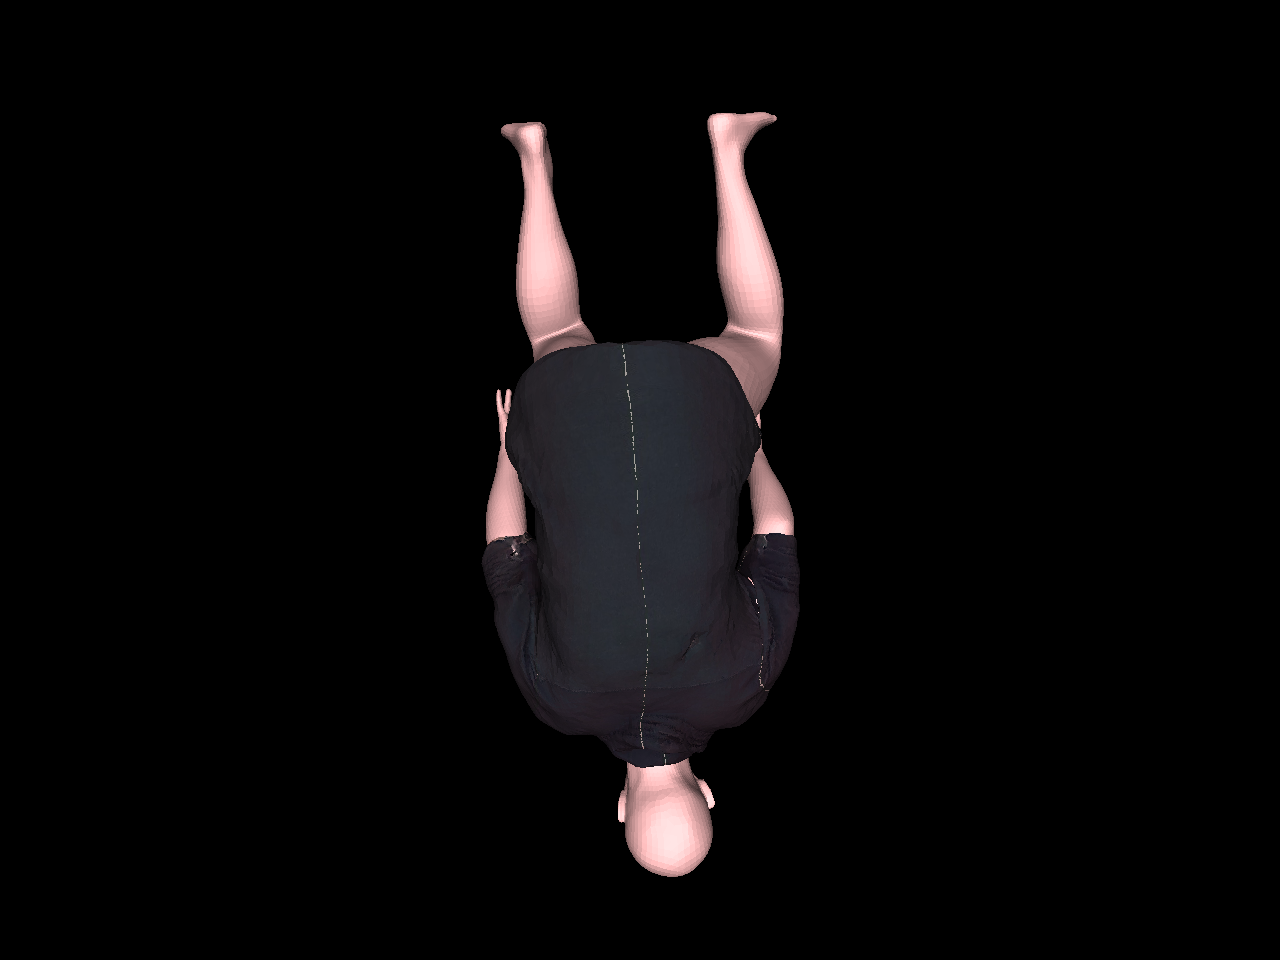

In [51]:
Image('new_garment_tgt_body.png')